# Credit Card Fraud Detection


Credit card fraud is when someone uses another person's credit card or account information to make unauthorized purchases or access funds through cash advances. Credit card fraud doesn’t just happen online; it happens in brick-and-mortar stores, too. As a business owner, you can avoid serious headaches – and unwanted publicity – by recognizing potentially fraudulent use of credit cards in your payment environment.

# Problem
The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be a fraud. This model is then used to identify whether a new transaction is fraudulent or not. Our aim here is to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

# Observation
- Very few transactions are actually fraudulent (less than 1%). The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions.
 
- The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.

- The ‘Time’ and ‘Amount’ features are not transformed data.

- There is no missing value in the dataset.

# Buisness Questions
Since all features are anonymous, we will focus our analysis on non-anonymized features: Time, Amount

How different is the amount of money used in different transaction classes?

Do fraudulent transactions occur more often during a certain frames?

**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.warn('ignore', FutureWarning)
%matplotlib inline
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('/Users/harshithareddy/Desktop/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#decreasing decimals in the dataset
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


Check the missing value in dataset

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**The only non-transformed variables to work with are:**
- Time
- Amount
- Class (1: fraud, 0: not_fraud)

Text(0, 0.5, 'Frequency')

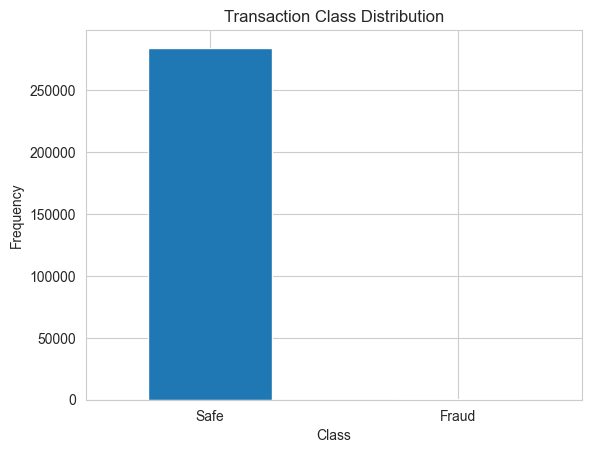

In [8]:
labels = ["Safe", "Fraud"]

count_classes = pd.value_counts(df['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

Here we can see that, in this dataset very few transactions are actually fraudlent

In [9]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

## Statistical Analtsis

- For dealing with outilers, IQR(Inter Quanrtile Range) in which we will eliminate the outliers those are less than 10th percentile greater than 90th percentile.

In [10]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.75)
IQR = Q2-Q1
print("IQR of whole dataset: ")
print(IQR)

IQR of whole dataset: 
Time     85119.00
V1           2.24
V2           1.40
V3           1.92
V4           1.59
V5           1.30
V6           1.17
V7           1.12
V8           0.54
V9           1.24
V10          0.99
V11          1.50
V12          1.02
V13          1.31
V14          0.92
V15          1.23
V16          0.99
V17          0.88
V18          1.00
V19          0.92
V20          0.34
V21          0.41
V22          1.07
V23          0.31
V24          0.79
V25          0.67
V26          0.57
V27          0.16
V28          0.13
Amount      71.56
Class        0.00
dtype: float64


In [11]:
print("Skewness of the data: ")
df_skew = df.skew()
print(df_skew)

Skewness of the data: 
Time     -0.04
V1       -3.28
V2       -4.62
V3       -2.24
V4        0.68
V5       -2.43
V6        1.83
V7        2.55
V8       -8.52
V9        0.55
V10       1.19
V11       0.36
V12      -2.28
V13       0.07
V14      -2.00
V15      -0.31
V16      -1.10
V17      -3.84
V18      -0.26
V19       0.11
V20      -2.04
V21       3.59
V22      -0.21
V23      -5.88
V24      -0.55
V25      -0.42
V26       0.58
V27      -1.17
V28      11.19
Amount   16.98
Class    24.00
dtype: float64


## Box Plot of the data

Detecting Outilers:
 


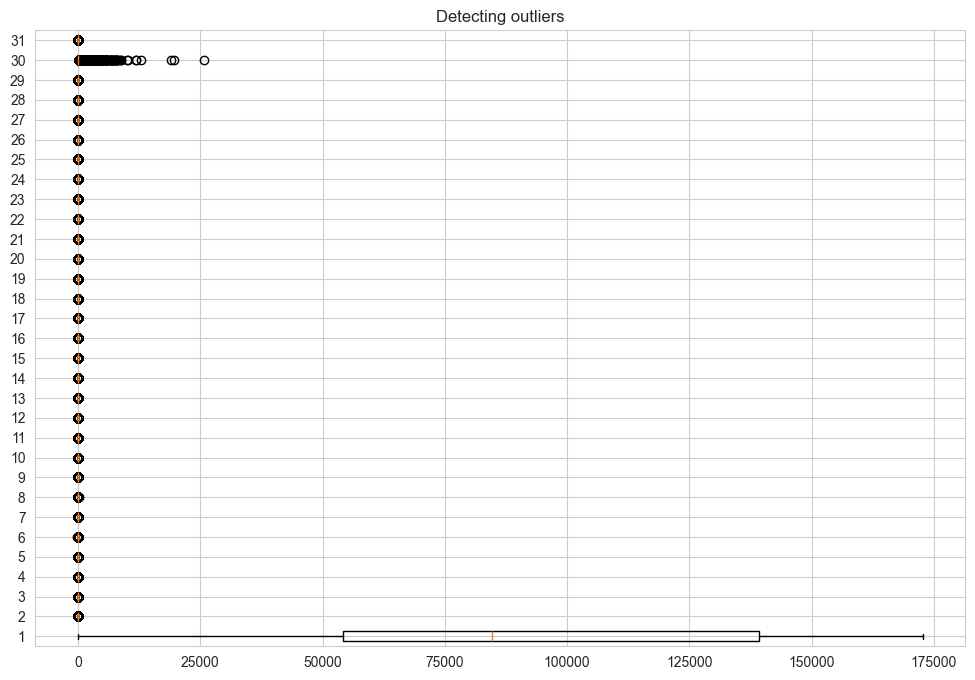

In [12]:
print("Detecting Outilers:\n ")
plt.figure(figsize=(12,8))
plt.boxplot(df, vert=False)
plt.title("Detecting outliers")
plt.show()

- Time and Amount y-axis displaying outliers, lets check about those.

Note: Columns other than Time, Amount and Class contains numbers within certain range,  we can deal with them in preprocessing stage.

Time Column
Detecting Outilers:
 


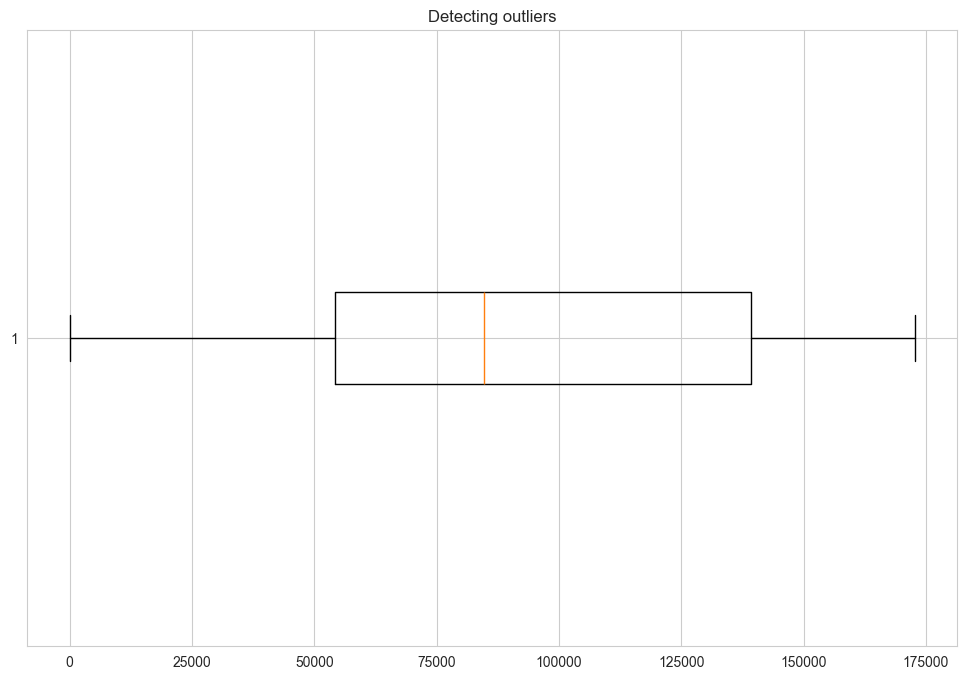

In [13]:
def box_out(df):
    print("Detecting Outilers:\n ")
    plt.figure(figsize=(12,8))
    plt.boxplot(df, vert=False)
    plt.title("Detecting outliers")
    plt.show()
    
print("Time Column")
box_out(df['Time'])

- There is no problem in Time column

 Analyzing **Amount** feature for better undersating on Amount

In [14]:
df['Amount'].describe()

count   284807.00
mean        88.35
std        250.12
min          0.00
25%          5.60
50%         22.00
75%         77.16
max      25691.16
Name: Amount, dtype: float64

Above description showed us that m range of maximum and minimum amount of transaction is between 0-25691

### Box plot on Amount to identiying the outliers form that column

Outliers of Amount: :
Detecting Outilers:
 


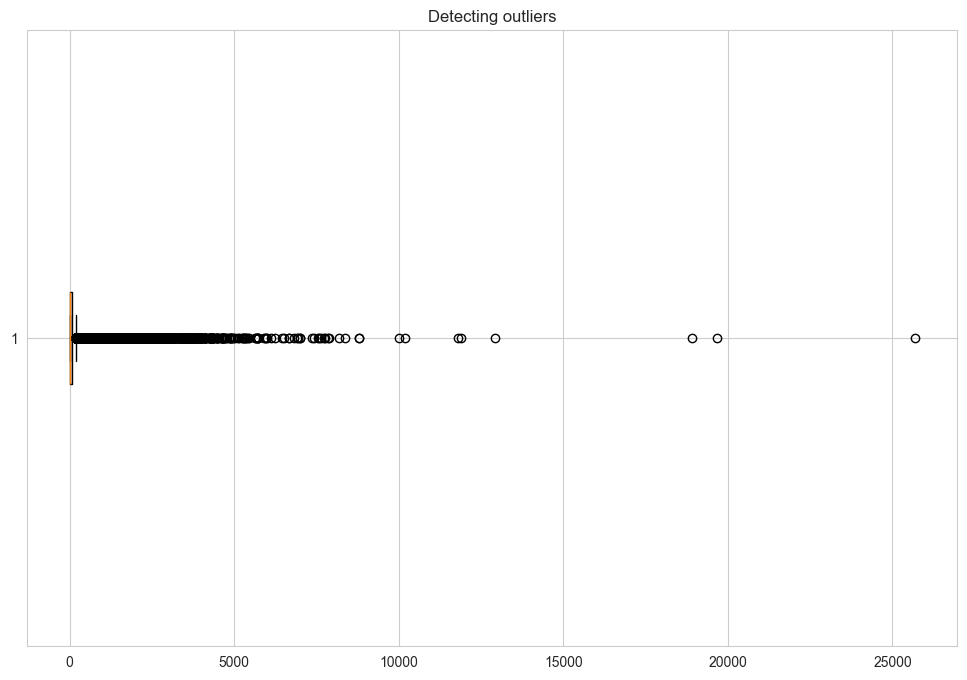

In [15]:
print("Outliers of Amount: :")
box_out(df['Amount'])      

- There are good amount of outilers in the Amount column. Amount column is too important in this data.
-  Above image showing us that after 900 there are outilers which are distributed till 25000+

## Removing outliers 
with 
**Quantile based Flooring and capping**


In [16]:
# Percentiles 
print("10th percentile of Amount: ")
print(df["Amount"].quantile(0.10))
print("90th percentile of price: ")
print(df["Amount"]. quantile(0.90))

10th percentile of Amount: 
1.0
90th percentile of price: 
203.0


- From above percentiles (10 & 90) we can remove data points those are out of this range but there may not ourliers under 10th percentile.
- So lets remove outliers those are greater than 90th percentile and plot a boxplot so we can see if there are any outliers less than 10th percentile.

After removing outliers >90th percentile: :
Detecting Outilers:
 


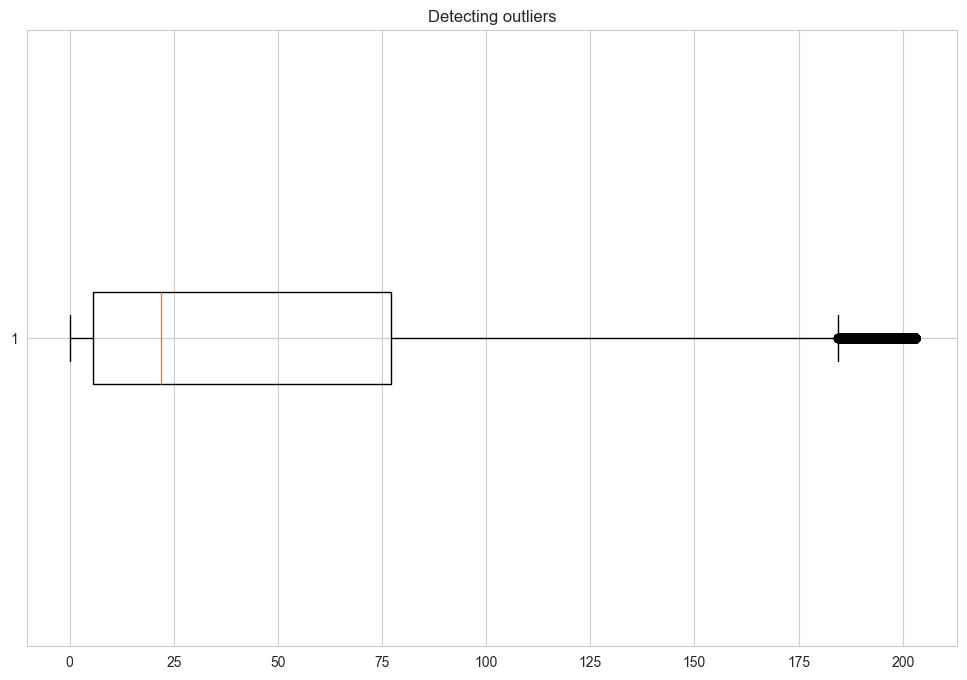

In [17]:
df['Amount'] = np.where(df['Amount']>203.0, 203.0, df['Amount'])

print("After removing outliers >90th percentile: :")
box_out(df['Amount'])

- We eliminated most of the outlier those are greater than 90th percentile from the data. 
- Let's Keep remaining tail, coz that contains good amount of points

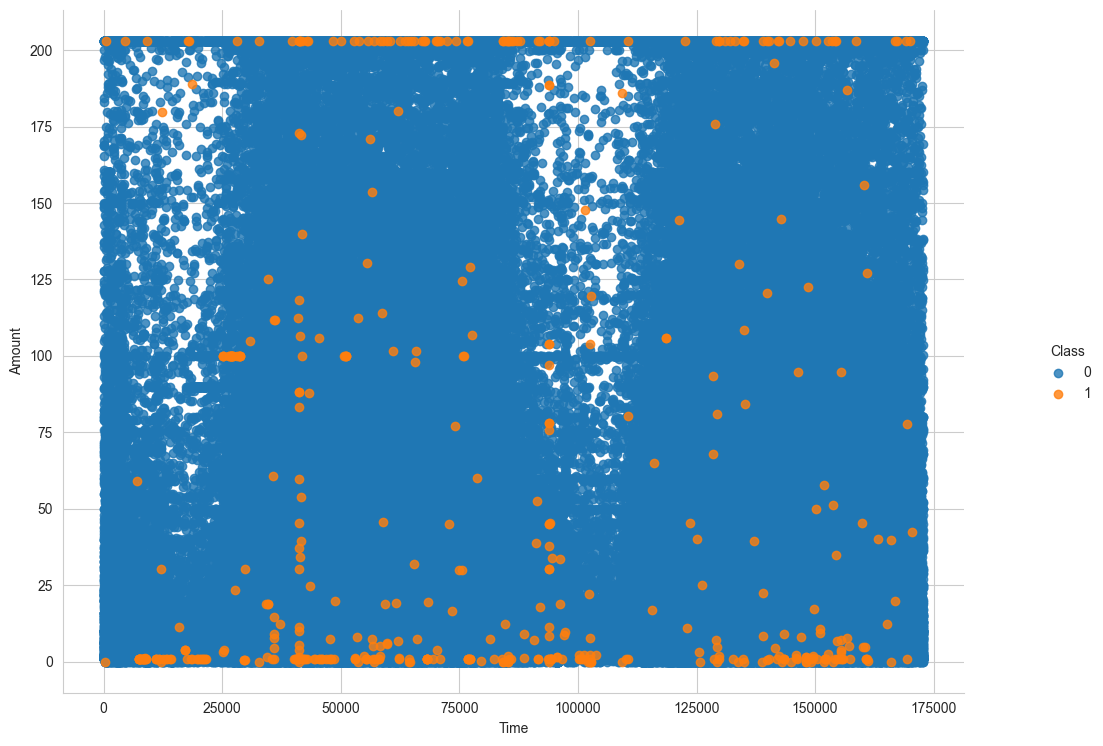

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(data=df, x='Time', y='Amount', hue='Class', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()


In [19]:
fraud = df[df['Class']==1]
safe = df[df['Class']==0]

print(f"Shape of Fraudlent transactions: {fraud.shape}")
print(f"Shape of Non-Fraudlent transactions: {safe.shape}")

Shape of Fraudlent transactions: (492, 31)
Shape of Non-Fraudlent transactions: (284315, 31)


How different are the amount of money used in different transaction classes?

In [20]:
pd.concat([fraud.Amount.describe(), safe.Amount.describe()], axis=1)

,Amount,Amount
count,492.00,284315.00
mean,61.82,53.68
std,78.30,65.99
min,0.00,0.00
25%,1.00,5.65
50%,9.25,22.00
75%,105.89,77.05
max,203.00,203.00


Do fraudulent transactions occur more often during certain time frame ?

In [21]:
pd.concat([fraud.Time.describe(), safe.Time.describe()], axis=1)

,Time,Time
count,492.00,284315.00
mean,80746.81,94838.20
std,47835.37,47484.02
min,406.00,0.00
25%,41241.50,54230.00
50%,75568.50,84711.00
75%,128483.00,139333.00
max,170348.00,172792.00


/var/folders/2g/rsx23ks93bdd2v0z1pllwnfh0000gn/T/ipykernel_60070/2164316186.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'], color='blue');
/var/folders/2g/rsx23ks93bdd2v0z1pllwnfh0000gn/T/ipykernel_60070/2164316186.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount']

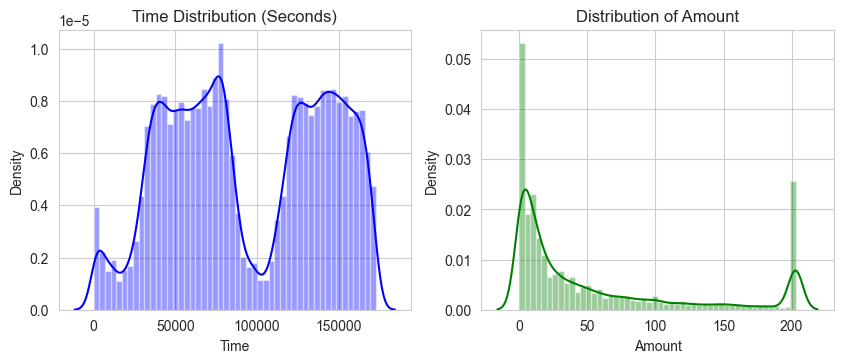

In [22]:
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.distplot(df['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(df['Amount'],color='green');

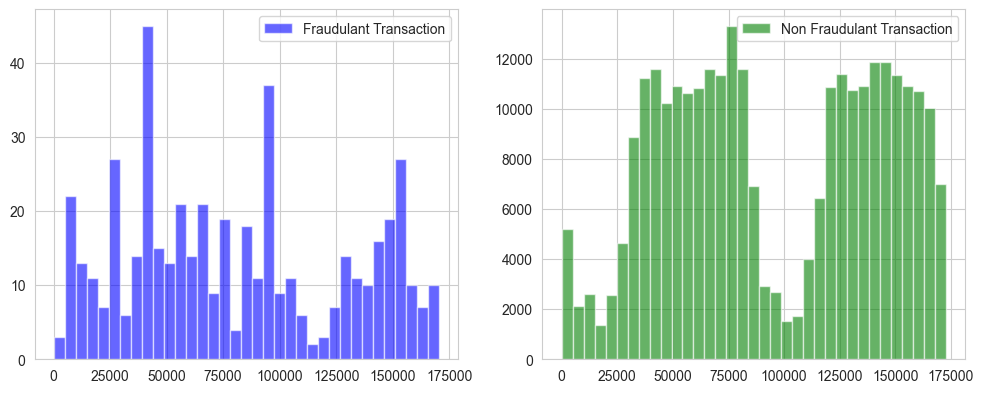

In [23]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df[df.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
df[df.Class == 0].Time.hist(bins=35, color='green', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

Doesn't seem like the time of transaction really matters here as per above observation. Now let us take a sample of the dataset for out modelling and prediction

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

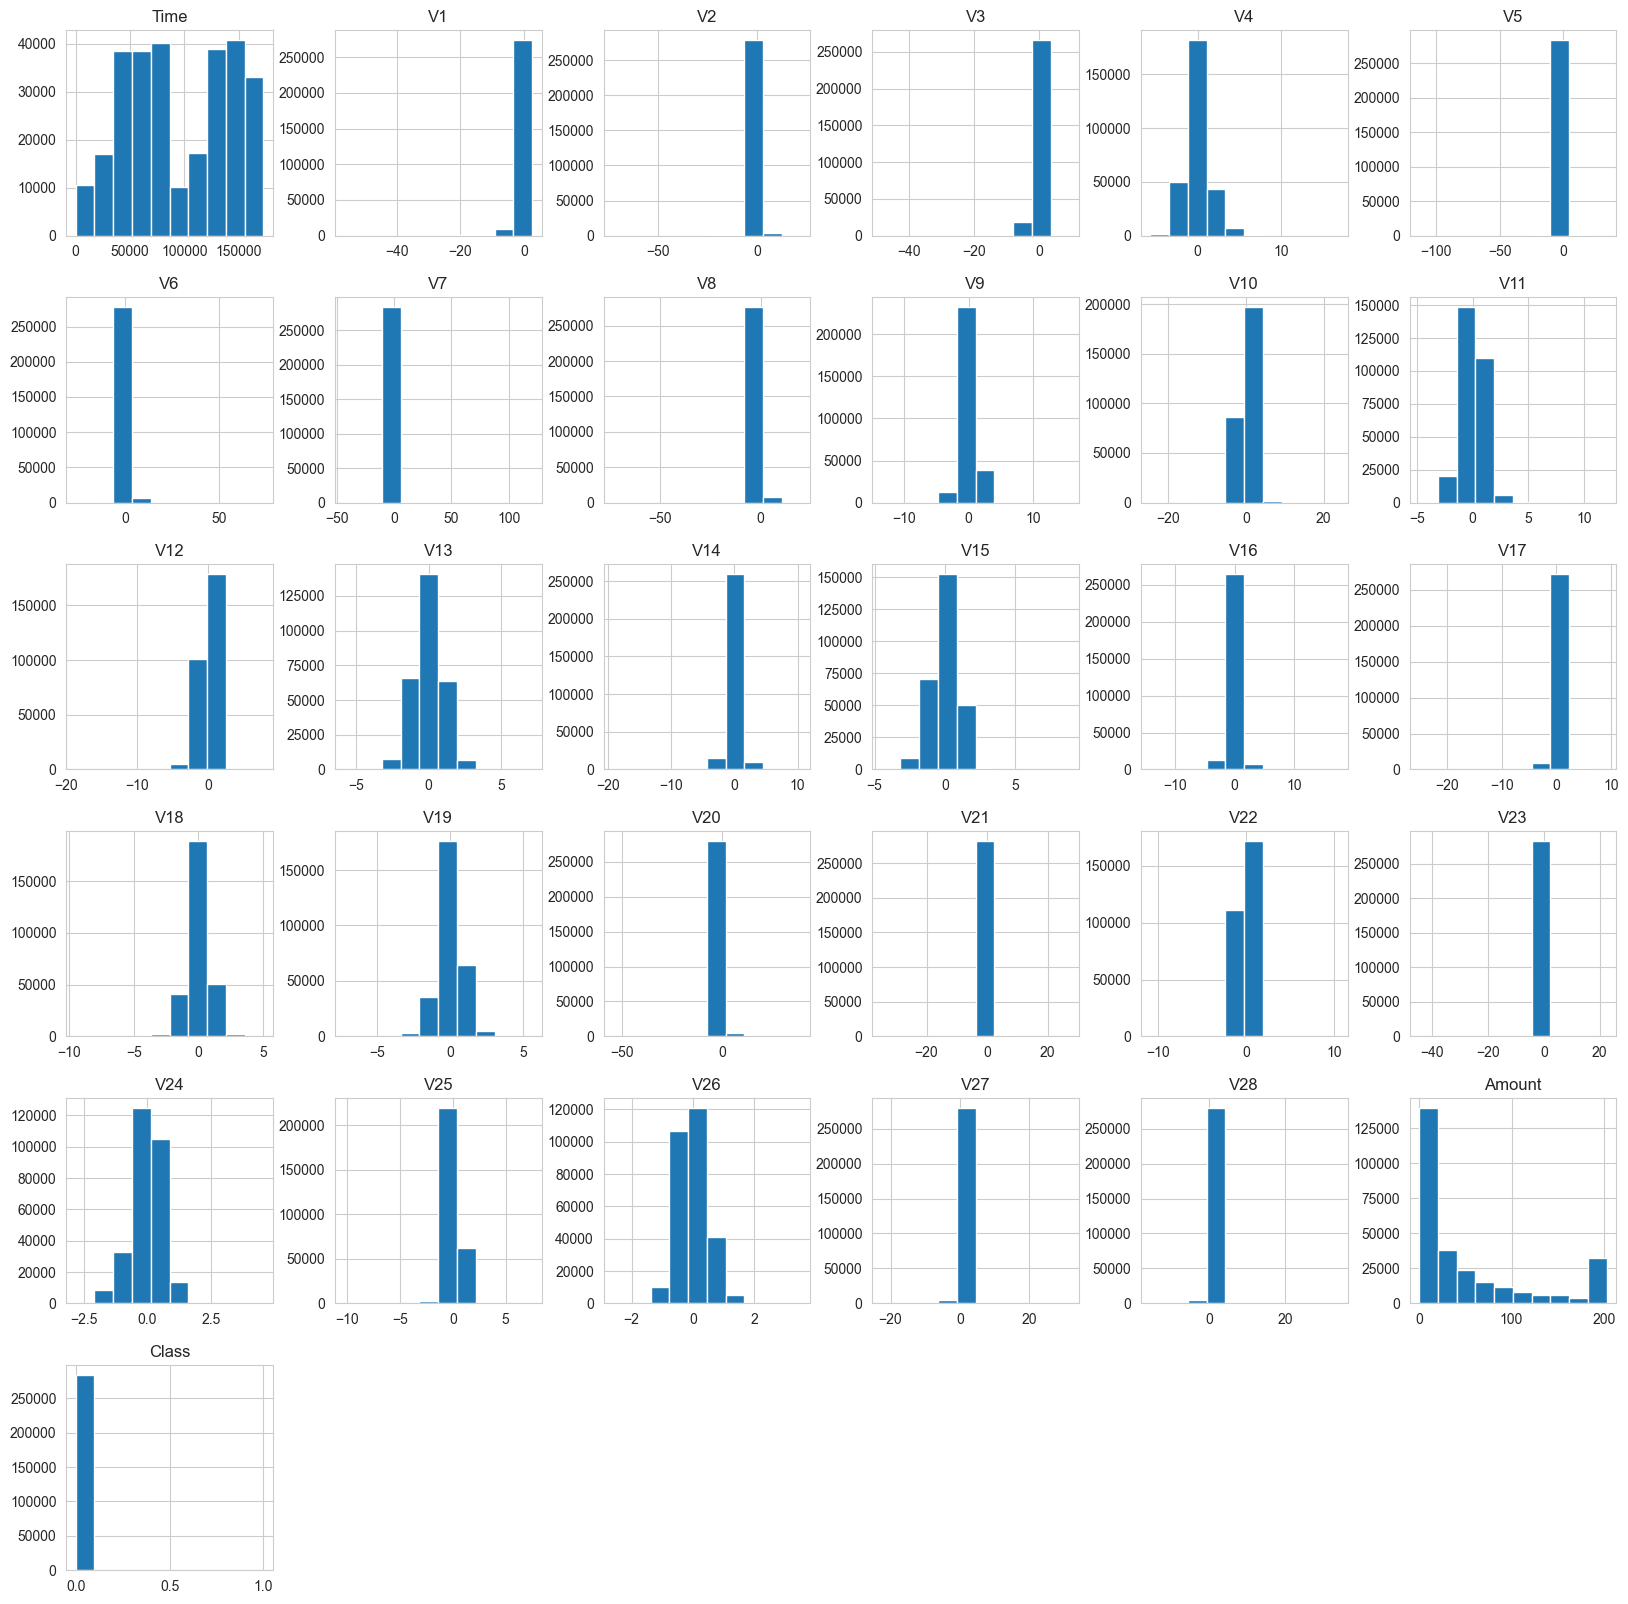

In [24]:
df.hist(figsize=(20,20))

In [25]:
# df.corr()

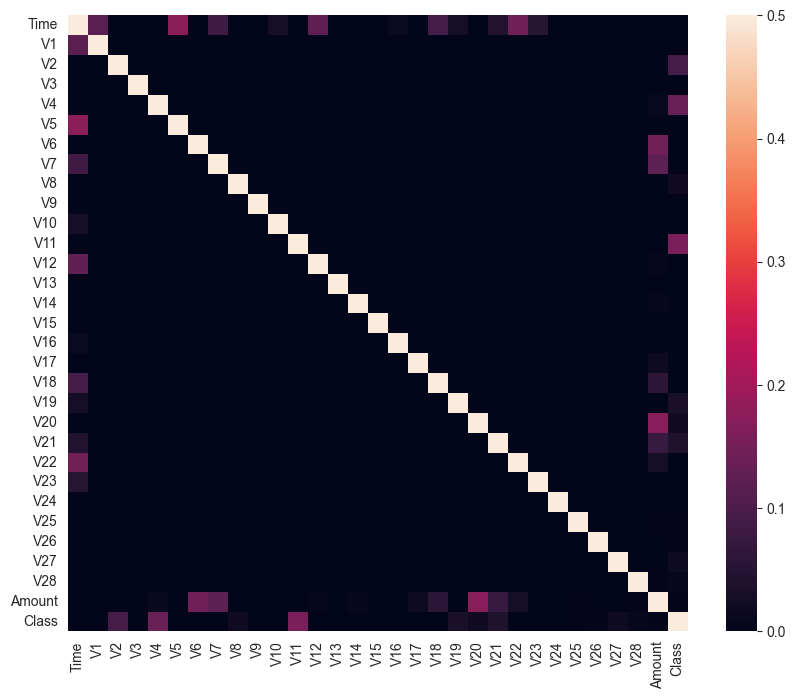

In [26]:
#Lets find high correlations

plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), vmin=0,vmax=0.5, annot=False)
plt.show()

Highest correlations come from:

- Time & V3 (-0.42)
- Amount & V2 (-0.53)
- Amount & V4 (0.4)


- While these correlations are high, I don't expect it to run the risk of multicollinearity.

- The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

# Data Processing

Time and Amount should be scaled as the other columns.

Spliting dataset into train and test

In [27]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [28]:
print(X.shape, X_train.shape, X_test.shape)

(284807, 30) (199364, 30) (85443, 30)


Standardization 

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training Machine Learning Model

It a supervises ML task with classification problem. 

**XGBoost**

(If model will not train well by above algorithms, then we can train with **ANN**)

In [1]:
%pip install xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## XGBClassifier

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Load your dataset
df = pd.read_csv('/Users/harshithareddy/Desktop/creditcard.csv') 

# Features and target variable
X = df.iloc[:, :-1].values  # All columns except the last
y = df.iloc[:, -1].values   # The last column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training with XGBoost Classifier
print("Training with XGBoost Classifier: ")
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Score the model
print("\nScore of XGBClassifier on training data: ")
print(xgb.score(X_train, y_train))


Training with XGBoost Classifier: 

Score of XGBClassifier on training data: 
1.0


# Evaluating the Model


Score of training


In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
train_pred = xgb.predict(X_train)
print(accuracy_score(train_pred, y_train))

1.0


Score of testing


In [7]:
test_pred = xgb.predict(X_test)
print(accuracy_score(test_pred, y_test))

0.9996137776061234


**Classification Report**

In [8]:
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85324
           1       0.82      0.93      0.87       119

    accuracy                           1.00     85443
   macro avg       0.91      0.97      0.94     85443
weighted avg       1.00      1.00      1.00     85443



**Confusion Matrix**

In [9]:
cm = confusion_matrix(y_test, test_pred)
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[85299     8]
 [   25   111]]


## Our model perofmed very well for this problem. 
There is no need of tunning.